In [8]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

In [12]:
PATH_CWD = Path(os.path.abspath(""))
PATH_DATA_RAW = PATH_CWD / "data_raw"
PATH_DATA = PATH_CWD / "data"

Prepare raw bitcoin file

In [30]:
# read 
df = pd.read_csv(PATH_DATA_RAW / "bitcoin_2015_to_2023.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.rename(columns={"Date":"datetime", "Open":"open"})

# filter to 2022
df = df.loc[(df["datetime"] >= "2021-12-01") & (df["datetime"] <= "2022-12-31")]

Aggregate to day

In [17]:
freq = "D"
dfd = df.groupby(pd.Grouper(key="datetime", freq=freq))["open"].first().to_frame()

<Axes: xlabel='datetime'>

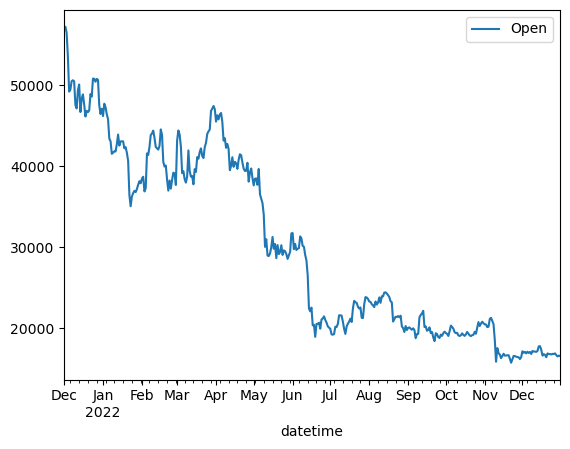

In [18]:
dfd.plot()

In [66]:
freq = "H"
dfh = df.groupby(pd.Grouper(key="datetime", freq=freq))["open"].first().to_frame().copy()

In [67]:
lag = 5
dfh.loc[:,f"open_lag_{lag}"] = dfh["open"].shift(periods=lag)
dfh = dfh[dfh.index.to_series().between('2022-01-01', '2022-12-31')]

Compute lagged performance

In [68]:
dfh[f"perf_{lag}"] = (dfh[f"open_lag_{lag}"] - dfh["open"]) / dfh["open"]

In [70]:
# export hourly data
dfh.to_csv(PATH_DATA / "bitcoin_2022_hourly.csv")

Add signal

In [60]:
dfh.loc[:,"rand_signal"] = np.random.rand(dfh.shape[0])

C:\Users\jakob\AppData\Local\Temp\ipykernel_22476\721909973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh.loc[:,"rand_signal"] = np.random.rand(dfh.shape[0])


In [61]:
dfh

,open,open_lag_5,perf_5,rand_signal
datetime,,,,
2022-01-01 00:00:00,46220.00,46666.97,0.009670,0.006882
2022-01-01 01:00:00,46663.14,45707.67,-0.020476,0.218619
2022-01-01 02:00:00,46779.88,45888.94,-0.019045,0.035182
2022-01-01 03:00:00,46810.78,46329.08,-0.010290,0.383920
2022-01-01 04:00:00,46806.83,46320.28,-0.010395,0.583125
...,...,...,...,...
2022-12-30 20:00:00,16516.91,16400.46,-0.007050,0.122153
2022-12-30 21:00:00,16550.00,16550.09,0.000005,0.624424
2022-12-30 22:00:00,16581.89,16549.00,-0.001983,0.573836


In [62]:
dfh["real"] = dfh[f"perf_{lag}"] * dfh["rand_signal"]

C:\Users\jakob\AppData\Local\Temp\ipykernel_22476\39442227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh["real"] = dfh[f"perf_{lag}"] * dfh["rand_signal"]


<Axes: >

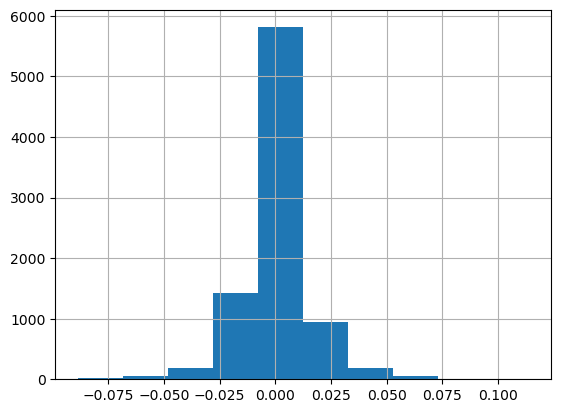

In [63]:
dfh["perf_5"].hist()

<Axes: xlabel='datetime'>

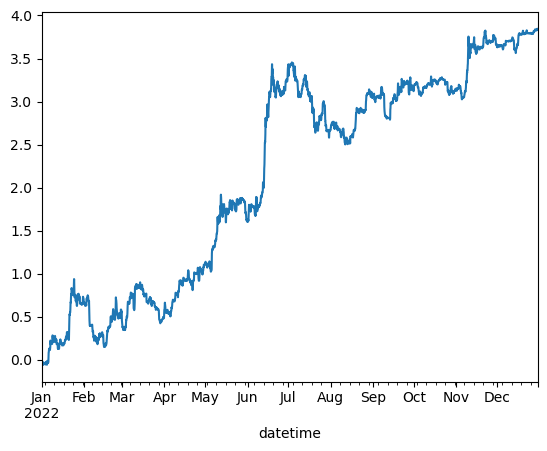

In [64]:
dfh["real"].cumsum().plot()

- no intercept: if we have no information, we don't trade => alpha = 0 => no prediction
- smooth reward trend